12288
[130  99  73  51  74 101 131 165]
(array([0.2044802 , 0.17884689, 0.15324301, 0.12766427, 0.15324301,
       0.17884689, 0.2044802 , 0.23014726]), array([3.63246651, 3.47819187, 3.53429174, 3.61283155, 3.79609112,
       3.92699082, 3.82881605, 3.75245789]))
(0.17884689155751526, 3.7025913417308276)


<IPython.core.display.Javascript object>


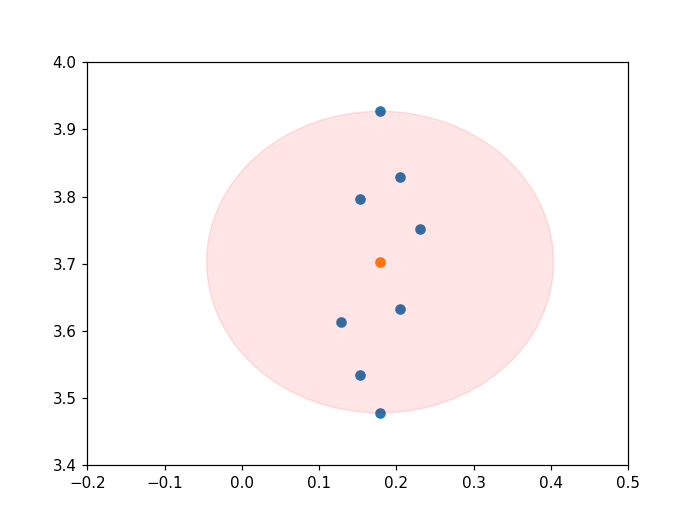

In [17]:
import healpy
import numpy

NSIDE = 32
NPIX = healpy.nside2npix(NSIDE)
print(NPIX)
m = numpy.arange(healpy.nside2npix(NSIDE))

point = 100
neighbors = healpy.get_all_neighbours(32, 100)
print(neighbors)


cooNeigh = healpy.pix2ang(32, neighbors)
cooCenter = healpy.pix2ang(32,100)

dists = numpy.sqrt((cooNeigh[0]- cooCenter[0])**2 + (cooNeigh[1]- cooCenter[1])**2 )
distmax = numpy.amax(dists)
print(cooNeigh)
print(cooCenter)

%matplotlib notebook
from matplotlib import pyplot

circle1 = pyplot.Circle(cooCenter, distmax, color='r', alpha = 0.1)
pyplot.gca().add_patch(circle1)
pyplot.xlim(-0.2,0.5)
pyplot.ylim(3.4,4)
pyplot.scatter(cooNeigh[0], cooNeigh[1])
pyplot.scatter(cooCenter[0], cooCenter[1])

[  12   26   28   31   37   52  108  126  142  187  192  222  232  247
  262  292  327  352  574  659  759  764  779  844  889 1218 1388 1423
 1653 1663 1988]
10
11
13
15
16
17
14
8
9
12
/m100_work/INF21_virgo_0/ilarosa0/data/outliers/LL/in_O3LL_02_0352_.mat
['5' '_02_0352_' '356.78125']
(5, 16428410) 657136400 1282 20480.0


<IPython.core.display.Javascript object>


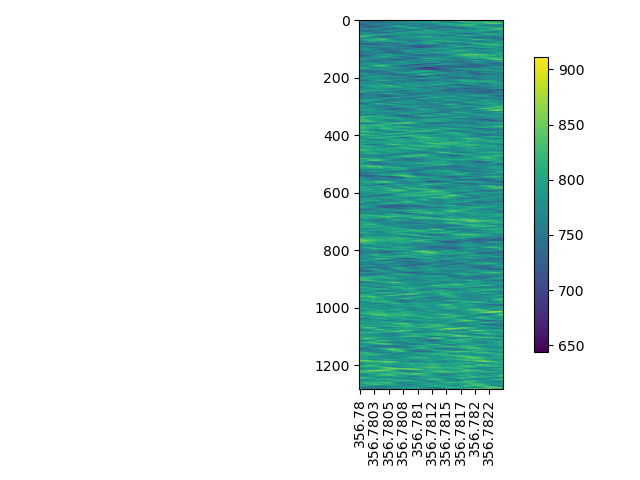

[ 0 10 20 30 40 50 60 70 80 90] [356.78   356.7803 356.7805 356.7808 356.781  356.7812 356.7815 356.7817
 356.782  356.7822]


(1282, 4096, 352)

In [25]:
import numpy
import scipy.io
from matplotlib import pyplot
import glob

%matplotlib notebook
fileslistH = glob.glob("/m100_work/INF21_virgo_0/ilarosa0/data/outliers/LH/*")
fileslistH = numpy.sort(numpy.array(fileslistH))
#print(fileslistH)
fileslistL = glob.glob("/m100_work/INF21_virgo_0/ilarosa0/data/outliers/LL/*")
fileslistL = numpy.sort(numpy.array(fileslistL))

freqlist = fileslistH
for i in numpy.arange(fileslistH.size):
    freqlist[i] = fileslistH[i][-9:-5]
freqlist = freqlist.astype(int)
print(freqlist)
freqOutliers = numpy.array([
#28.5,
#37.1875,
#126.875,
194.5625,
222.59375,
247.28125,
296.9375,
329.125,
356.78125,
#663.96875,
#765.1875,
#781.125,
#1426.5, 
#1655.375,
#1666.9375,
265.57511877757923,
#848.9396993984999, 
#575.1635074241274,
#108.85715939301163,
#1391.005468473,
#52.80832435807102,
145.49767078635,
#1220.4434862744001,
190.16794405675,
#763.8473164930596,
#26.333433815695,
#31.42470782475597,
#37.854147618750005,
#12.42700246067,
#1991.092300246067,
234.567,
#890.123
])

fileslistH = glob.glob("/m100_work/INF21_virgo_0/ilarosa0/data/outliers/LH/*")
fileslistH = numpy.sort(numpy.array(fileslistH))
#print(fileslistH)
fileslistL = glob.glob("/m100_work/INF21_virgo_0/ilarosa0/data/outliers/LL/*")
fileslistL = numpy.sort(numpy.array(fileslistL))

analist = numpy.zeros(freqOutliers.size).astype("<U120")
fileslist = analist
for i in numpy.arange(freqOutliers.size):
    indice = numpy.where(freqOutliers[i]>freqlist)[0][-1]
    print(indice)
    analist[i] = fileslistH[indice]
    fileslist[i] = analist[i][49+9:-4]


outliest = numpy.stack([numpy.arange(fileslist.size),fileslist, freqOutliers], axis = 1)
#print(outliest)

def plotOutlier(lista, iD, detector):
    pathIn = "/m100_work/INF21_virgo_0/ilarosa0/data/outliers/" + detector + "/in_O3" + detector + lista[numpy.int(iD),1] + ".mat"
    print(pathIn)
    print(lista[iD])
    struct = scipy.io.loadmat(pathIn)['job_pack_0']
    freqInitial = struct['basic_info'][0,0]['frin'][0,0][0,0]
    freqFinal = struct['basic_info'][0,0]['frfi'][0,0][0,0]
    enhance = 10
    stepFreq = struct["basic_info"][0,0]["dfr"][0,0][0,0]
    refinedStepFreq =  stepFreq/enhance
    tFft = numpy.int32(1/stepFreq)
    numTimes = struct["basic_info"][0,0]["ntim"][0,0][0,0]
    tObs = tFft*numTimes/(2*60*60*24*30) # mesi
    #print(tObs, " mesi")
    tObs = numpy.round(tObs*30*24*60*60)
    fdotMin = -1e-8
    fdotMax = 1e-9
    stepFdot = stepFreq/tObs
    nstepFdot = numpy.round((fdotMax-fdotMin)/stepFdot).astype(numpy.int32)
    nstepFreq = (freqFinal-freqInitial)/stepFreq
    
    print(struct["peaks"][0][0].shape, struct["peaks"][0][0].nbytes, nstepFdot, nstepFreq)
    
    binOutlier = (numpy.float(lista[iD, 2])-freqInitial)/refinedStepFreq
    binOutlier = numpy.int(binOutlier)
    
    
    pathOut = "/m100_work/INF21_virgo_0/ilarosa0/output/in_O3" + detector + lista[numpy.int(iD),1] + "/"
    hough = scipy.io.loadmat(pathOut + "houghcand.mat")["houghcand"]
    cands = scipy.io.loadmat(pathOut + "outcands.mat")["cands"]
    #print(cands)
    pyplot.imshow(hough[:,binOutlier-50:binOutlier+50], aspect = 0.2)
    
    pos = numpy.arange(0,100,10)
    start = (binOutlier-50)*refinedStepFreq+freqInitial
    stop = (binOutlier+50)*refinedStepFreq+freqInitial
    nomi = numpy.arange(start,stop, (stop-start)/10)
    nomi = numpy.around(nomi, decimals = 4)
    print(pos, nomi)
    pyplot.xticks(pos,nomi,rotation='vertical')
    pyplot.tight_layout()
    cbar = pyplot.colorbar(shrink = 0.8,aspect = 20)
    return(nstepFdot, tFft, freqInitial)
    
plotOutlier(outliest, 5, "LL")

In [87]:
inputsize = 647298240/1e6

houghsize = 20480*10*1282*64
print(houghsize/1e6)



16803.4304


In [90]:
((-1e-8)-1e-9)/2

-5.5000000000000004e-09